In [1]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import glob, os, pickle, json, sys
import tables
from ctapipe.io import read_table
from astropy.coordinates import SkyCoord
import astropy.units as u
import subprocess

# DL1 reading for run 3318

In [2]:
run_number  = 3318

# DATACHECK FILE FOR RUN 3318
dcheck_file = "/fefs/aswg/data/real/DL1/20201217/v0.9/tailcut84/datacheck/datacheck_dl1_LST-1.Run03318.h5"

# STANDARD CONFIG FILE
config_file = "/fefs/aswg/workspace/juan.jimenez/cherenkov_transparency_corrections/data_processing_srunwise/config/standard_config.json"
# RF NODE FOR CRAB
rf_node     = "/fefs/aswg/data/models/AllSky/20230927_v0.10.4_crab_tuned/dec_2276"

# DL1 FILE AT IT CLUSTER
dl1_origin = "/fefs/aswg/data/real/DL1/20201217/v0.9/tailcut84/dl1_LST-1.Run03318.h5"
dl1_originv2 = "/fefs/aswg/data/real/DL1/20201217/v0.9G/tailcut84/dl1_LST-1.Run03318.h5"
# SCALED DL1 DILE
dl1_scaled  = "/fefs/aswg/workspace/juan.jimenez/data/cherenkov_transparency_corrections/crab/dl1_merged_scaled/dl1_LST-1.Run03318.h5"

# GENERATED DL2 FILES
dl2_origin   = "data/cluster/dl2_LST-1.Run03318.h5"
dl2_originv2 = "data/clusterv2/dl2_LST-1.Run03318.h5"
dl2_scaled   = "data/scaled/dl2_LST-1.Run03318.h5"

avg_scaling = 0.979

# Reading the binning and elapsed time

In [3]:
elapsed_time = sum(tables.open_file(dcheck_file).root.dl1datacheck.cosmics.col("elapsed_time"))
print(f"Elapsed time in total is {elapsed_time / 60:.2f} mins")

bins = tables.open_file(dcheck_file).root.dl1datacheck.histogram_binning.col("hist_intensity")[0]
binsc = (bins[:-1] + bins[1:])/2
binsw = np.diff(bins)

Elapsed time in total is 18.83 mins


# DL1 counts for hist intensity

In [12]:
!ls /fefs/aswg/data/real/DL1/20201217

v0.6.3_v05  v0.7.1  v0.9  v0.9G


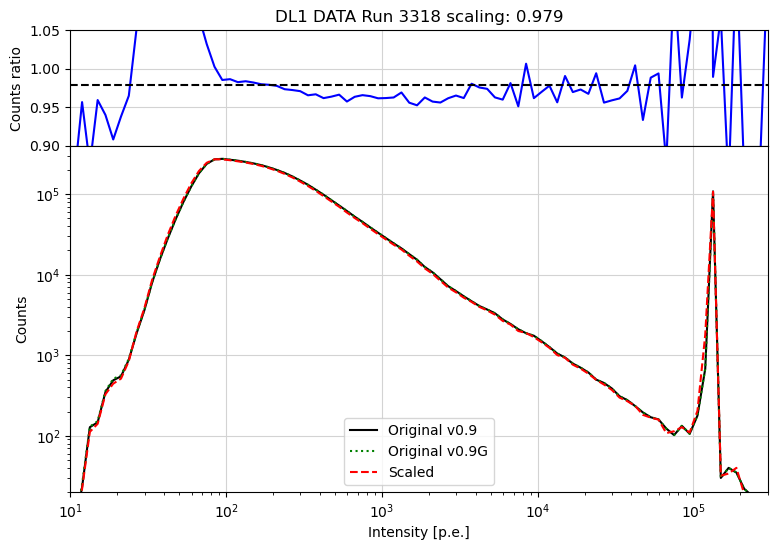

In [4]:
ccdl1 = []
for dl1 in [dl1_origin, dl1_scaled, dl1_originv2]:
    tab = tables.open_file(dl1).root.dl1.event.telescope.parameters.LST_LSTCam
    counts, _ = np.histogram(tab.col("intensity"), bins)
    ccdl1.append(counts)


fig, (axu, ax) = plt.subplots(2, 1, figsize=(9,6), sharex=True, gridspec_kw={'height_ratios': [1, 3]})

axu.plot(binsc, ccdl1[1]/ccdl1[0], c="b", ls="-", label="")
axu.axhline(avg_scaling, c="k", ls="--")
axu.set_ylim(0.9, 1.05)

ax.plot(binsc, ccdl1[0], c="k", ls="-", label="Original v0.9")
ax.plot(binsc, ccdl1[2], c="g", ls=":", label="Original v0.9G")
ax.plot(binsc, ccdl1[1], c="r", ls="--", label="Scaled")

ax.loglog()
axu.set_ylabel("Counts ratio")
ax.set_xlabel("Intensity [p.e.]")
ax.set_ylabel("Counts")
ax.grid(color="lightgray")
axu.grid(color="lightgray")
axu.set_title(f"DL1 DATA Run {run_number} scaling: {avg_scaling:.3f}")
ax.legend()
ax.set_xlim(10, 3e5)
ax.set_ylim(2e1, 4e5)
plt.subplots_adjust(wspace=0, hspace=0)

plt.show()

# Applying dl1_to_dl2

In [5]:
# %%time
# command1   = f"lstchain_dl1_to_dl2 --input-files {dl1_origin}   --path-models {rf_node} --output-dir data/cluster/   --config {config_file}"
# command1v2 = f"lstchain_dl1_to_dl2 --input-files {dl1_originv2} --path-models {rf_node} --output-dir data/clusterv2/ --config {config_file}"
# command2   = f"lstchain_dl1_to_dl2 --input-files {dl1_scaled}   --path-models {rf_node} --output-dir data/scaled/    --config {config_file}"
# print(command1)
# subprocess.run(command1, shell=True)
# print("\n\n", command1v2)
# subprocess.run(command1v2, shell=True)
# print("\n\n", command2)
# subprocess.run(command2, shell=True)

# DL1 counts for hist intensity

/tmp/ipykernel_25352/576076308.py:11: RuntimeWarning: invalid value encountered in divide
  axu.plot(binsc, ccdl2[1]/ccdl2[0], c="b", ls="-", label="")


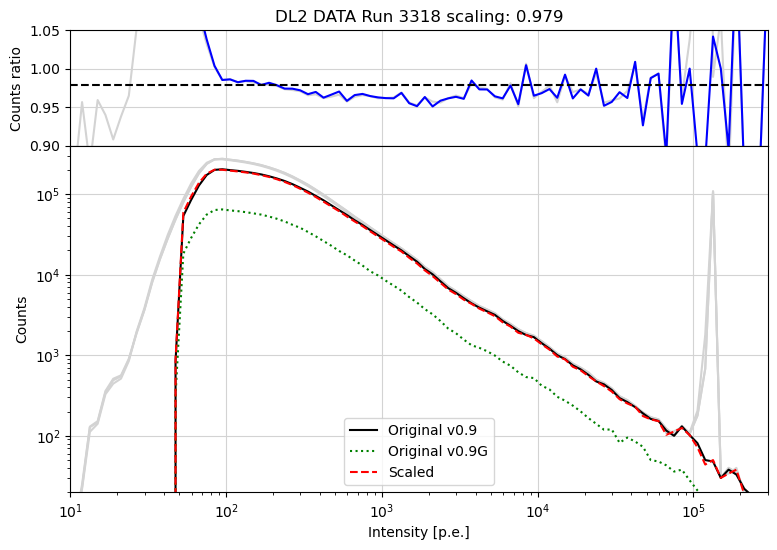

In [6]:
ccdl2 = []
for dl2 in [dl2_origin, dl2_scaled, dl2_originv2]:
    tab = tables.open_file(dl2).root.dl2.event.telescope.parameters.LST_LSTCam
    counts, _ = np.histogram(tab.col("intensity"), bins)
    ccdl2.append(counts)


fig, (axu, ax) = plt.subplots(2, 1, figsize=(9,6), sharex=True, gridspec_kw={'height_ratios': [1, 3]})

axu.plot(binsc, ccdl1[1]/ccdl1[0], c="lightgray", ls="-", label="")
axu.plot(binsc, ccdl2[1]/ccdl2[0], c="b", ls="-", label="")
axu.axhline(avg_scaling, c="k", ls="--")
axu.set_ylim(0.9, 1.05)

ax.plot(binsc, ccdl1[0], c="lightgray", ls="-",)
ax.plot(binsc, ccdl1[2], c="lightgray", ls="-",)
ax.plot(binsc, ccdl1[1], c="lightgray", ls="-",)

ax.plot(binsc, ccdl2[0], c="k", ls="-", label="Original v0.9")
ax.plot(binsc, ccdl2[2], c="g", ls=":", label="Original v0.9G")
ax.plot(binsc, ccdl2[1], c="r", ls="--", label="Scaled")

ax.loglog()
axu.set_ylabel("Counts ratio")
ax.set_xlabel("Intensity [p.e.]")
ax.set_ylabel("Counts")
ax.grid(color="lightgray")
axu.grid(color="lightgray")
axu.set_title(f"DL2 DATA Run {run_number} scaling: {avg_scaling:.3f}")
ax.legend()
ax.set_xlim(10, 3e5)
ax.set_ylim(2e1, 4e5)
plt.subplots_adjust(wspace=0, hspace=0)

plt.show()

In [7]:
!ls /fefs/aswg/data/real/DL1/20201217

v0.6.3_v05  v0.7.1  v0.9  v0.9G
